In [41]:
import pickle
import pyaudio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [129]:
clasificador_completo = None
with open('grabaciones/clasificadores/clasificador_completo.clf', 'rb') as archivo:
    clasificador_completo = pickle.load(archivo)

In [43]:
def podar(nparray):
    min = 0
    max = -1
    for i in range(0, len(nparray)):
        if nparray[i] >= 0.4:
            min = i - 5000
            break
    print("El menor indice es " + str(i))
    for i in range(len(nparray) - 1, 0, -1):
        if nparray[i] >= 0.4:
            max = i + 5000
            break
    print("El mayor indice es " + str(i))
    for i in range(0, len(nparray)):
        if i < min or i > max:
            nparray[i] = 0
    return min, max

Comenzando grabación...
Terminando grabación...
Terminando reproducción
Comenzando el procedimiento...
Señal convertida...
Señal normalizada...
El menor indice es 47906
El mayor indice es 64488


/home/andreslinares97/Desktop/Proyecto Estocásticos/codigo/lib/python3.6/site-packages/ipykernel_launcher.py:35: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
/home/andreslinares97/Desktop/Proyecto Estocásticos/codigo/lib/python3.6/site-packages/ipykernel_launcher.py:35: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


andres/derecha


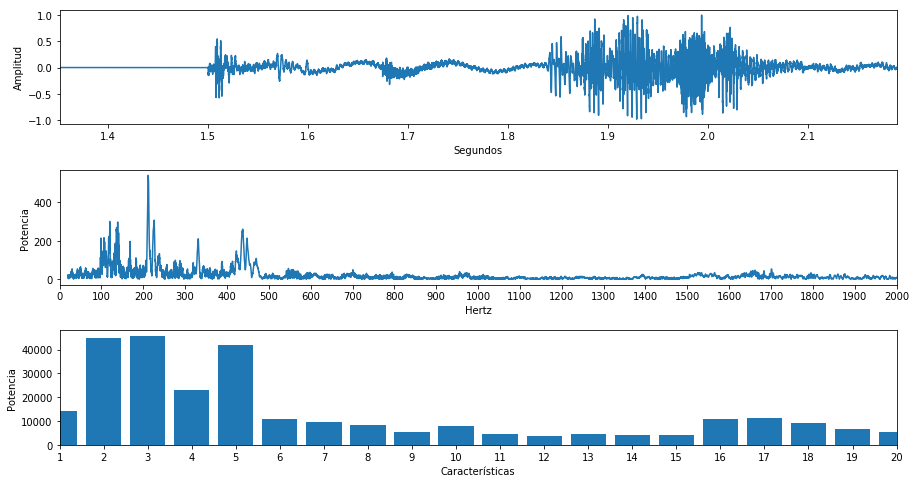

In [130]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 8]


FORMATO = pyaudio.paInt16
CANALES = 1
FRECUENCIA = 16000
CHUNK = 512
SEGUNDOS = 3
PEDAZOS = int(FRECUENCIA / CHUNK * SEGUNDOS)
GRABACIONES = 30

audio = pyaudio.PyAudio()
stream = audio.open(format=FORMATO, channels=CANALES,
                rate=FRECUENCIA, input=True,
                output=True,
                frames_per_buffer=CHUNK)

frames = []
print("Comenzando grabación...")
contador = 0
for i in range(0, int(FRECUENCIA / CHUNK * SEGUNDOS)):
    data = stream.read(CHUNK)
    frames.append(data)
    contador += 1
print("Terminando grabación...")
for frame in frames:
    stream.write(frame, CHUNK)
print("Terminando reproducción")

print("Comenzando el procedimiento...")

raw_data = np.zeros(PEDAZOS * CHUNK)
for frame in frames:
    raw_data = np.append(raw_data, np.fromstring(frame, 'Int16'))
print("Señal convertida...")
raw_data = raw_data / max(abs(raw_data))
print("Señal normalizada...")
v_min, v_max= podar(raw_data)

plt.subplot(3, 1, 1)
plt.plot(np.linspace(start=0, stop=3, num=len(raw_data)), raw_data)
plt.xlim(v_min / len(raw_data) * 3, v_max / len(raw_data) * 3)
plt.xlabel('Segundos')
plt.ylabel('Amplitud')

transformacion = np.abs(np.fft.fft(raw_data))
filtros = []
shift_mitad = len(transformacion) / 2
escalador = shift_mitad / (FRECUENCIA / 2)

plt.subplot(3, 1, 2)
plt.plot(np.linspace(start=20,
                     stop=2000,
                     num=len(transformacion[int(20 * escalador):int(2000 * escalador)])),
         transformacion[int(20 * escalador):int(2000 * escalador)])
plt.xlim(20, 2000)
plt.xticks(np.arange(0, 2100, step=100))
plt.xlabel('Hertz')
plt.ylabel('Potencia')

filtros.append(np.sum(transformacion[int(20 * escalador): int(100 * escalador)]))
filtros.append(np.sum(transformacion[int(100 * escalador): int(200 * escalador)]))
filtros.append(np.sum(transformacion[int(200 * escalador): int(300 * escalador)]))
filtros.append(np.sum(transformacion[int(300 * escalador): int(400 * escalador)]))
filtros.append(np.sum(transformacion[int(400 * escalador): int(500 * escalador)]))
filtros.append(np.sum(transformacion[int(500 * escalador): int(600 * escalador)]))
filtros.append(np.sum(transformacion[int(600 * escalador): int(700 * escalador)]))
filtros.append(np.sum(transformacion[int(700 * escalador): int(800 * escalador)]))
filtros.append(np.sum(transformacion[int(800 * escalador): int(900 * escalador)]))
filtros.append(np.sum(transformacion[int(900 * escalador): int(1000 * escalador)]))
filtros.append(np.sum(transformacion[int(1000 * escalador): int(1100 * escalador)]))
filtros.append(np.sum(transformacion[int(1100 * escalador): int(1200 * escalador)]))
filtros.append(np.sum(transformacion[int(1200 * escalador): int(1300 * escalador)]))
filtros.append(np.sum(transformacion[int(1300 * escalador): int(1400 * escalador)]))
filtros.append(np.sum(transformacion[int(1400 * escalador): int(1500 * escalador)]))
filtros.append(np.sum(transformacion[int(1500 * escalador): int(1600 * escalador)]))
filtros.append(np.sum(transformacion[int(1600 * escalador): int(1700 * escalador)]))
filtros.append(np.sum(transformacion[int(1700 * escalador): int(1800 * escalador)]))
filtros.append(np.sum(transformacion[int(1800 * escalador): int(1900 * escalador)]))
filtros.append(np.sum(transformacion[int(1900 * escalador): int(2000 * escalador)]))

plt.subplot(3, 1, 3)
plt.bar(range(1, 21), filtros)
plt.xlim(1, 20)
plt.xticks(np.arange(1, 21, step=1))
plt.xlabel('Características')
plt.ylabel('Potencia')

plt.subplots_adjust(hspace=0.4)

respuesta = clasificador_completo.predict(np.array(filtros).reshape(1, -1))[0]
print(respuesta)

In [128]:
respuesta='andres/izquierda'
solucion = pd.read_csv('grabaciones/{}.csv'.format(respuesta), index_col=0)
filtros.append(respuesta)
muestra = pd.DataFrame(columns=[
    '20-100 Hz',
    '100-200 Hz',
    '200-300 Hz',
    '300-400 Hz',
    '400-500 Hz',
    '500-600 Hz',
    '600-700 Hz',
    '700-800 Hz',
    '800-900 Hz',
    '900-1000 Hz',
    '1000-1100 Hz',
    '1100-1200 Hz',
    '1200-1300 Hz',
    '1300-1400 Hz',
    '1400-1500 Hz',
    '1500-1600 Hz',
    '1600-1700 Hz',
    '1700-1800 Hz',
    '1800-1900 Hz',
    '1900-2000 Hz',
    'Palabra'
])
muestra.loc[0] = filtros
nuevo = pd.concat([solucion, muestra], ignore_index=True)
print("ESTA BIEN? Y o N:")
letra = input()
if letra == 'Y':
    nuevo.to_csv('grabaciones/{}.csv'.format(respuesta))
nuevo

ESTA BIEN? Y o N:
Y


,20-100 Hz,100-200 Hz,200-300 Hz,300-400 Hz,400-500 Hz,500-600 Hz,600-700 Hz,700-800 Hz,800-900 Hz,900-1000 Hz,...,1100-1200 Hz,1200-1300 Hz,1300-1400 Hz,1400-1500 Hz,1500-1600 Hz,1600-1700 Hz,1700-1800 Hz,1800-1900 Hz,1900-2000 Hz,Palabra
0,26253.710533,29549.663395,30625.698446,20767.526263,33338.436899,26214.445612,12288.423522,5366.387413,7293.193279,6269.123266,...,3134.802440,3074.164666,4228.095552,10018.928554,13954.024867,10171.916540,9389.120917,13300.192257,12187.177107,andres/izquierda
1,20753.874828,24983.772672,32263.797081,24801.179255,32126.243513,21048.052212,6491.107214,3214.595807,5635.442563,5001.659341,...,3182.572896,2493.537418,3285.934464,8564.909690,7524.993007,7440.869806,6580.245869,6947.629061,9457.896728,andres/izquierda
2,19880.404324,30825.529971,31387.180743,24038.274493,37769.955881,24183.372616,15228.190991,3886.157414,5832.896039,5303.250340,...,3317.021090,3176.845630,4275.723013,8040.285900,9832.110513,5671.507959,7190.263775,5584.826530,6741.235150,andres/izquierda
3,30623.099390,42160.958161,40792.527524,28372.911939,44779.407423,31092.780273,16204.885800,5008.650701,6894.083901,7565.524769,...,4382.779326,4626.791294,5006.638583,9914.812358,9934.101128,8243.044489,7445.311814,9784.130464,9042.929482,andres/izquierda
4,29782.566473,34781.398020,37715.162345,22436.631111,38393.358846,22165.368542,10605.105743,4258.160273,6506.258772,6644.030368,...,3786.922803,3359.736252,5571.848412,8978.660667,9287.225846,7045.717294,7517.505937,11166.640112,8643.919686,andres/izquierda
5,27183.065869,27704.302780,30524.954236,18711.541361,31022.688384,26468.027492,17138.644856,5957.079072,8816.595073,7382.766186,...,4575.152738,4259.042269,5982.247029,10844.301626,8953.947664,7169.767800,7896.564491,6175.117767,4759.514256,andres/izquierda
6,21066.405941,23160.739763,28051.628477,19027.516689,32024.955242,23169.440367,14010.923849,3570.514822,5959.278443,5513.438090,...,3063.660462,3357.241896,5001.944816,10114.538512,12951.831698,13793.304161,7812.995877,7669.502647,8796.703913,andres/izquierda
7,41880.884953,36553.517167,29580.961194,20667.003022,26971.025091,27065.197244,7899.505146,3507.346658,6303.094494,6866.641287,...,3628.363520,3177.174542,3704.550510,7026.975389,16162.941615,12341.004649,15648.947376,13657.595665,12539.958737,andres/izquierda
8,22836.449887,31441.381611,38833.454240,23387.460775,40492.255676,24008.079804,16027.265052,4251.378734,6373.309166,6340.056665,...,3166.520166,3284.962045,3401.682038,6536.826794,15834.465999,10018.899330,9915.349120,8513.869321,4537.229993,andres/izquierda
9,28848.129481,39584.882104,36286.740838,26156.805521,28953.453379,23156.006413,23095.923601,6616.802067,6248.265355,7121.192969,...,4086.956620,4256.651296,4575.149145,10221.358613,15382.440510,9756.397742,7252.660812,8001.738913,7060.891327,andres/izquierda
